In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('feature_selected_data.csv',index_col=0)
df.head()

,id,cons_12m,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,...,forecast_price_pow_p1,margin_gross_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,origin_up_lxidpiddsbxsbosboudacockeimpuepw,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,avg_price_pow_energy
0,48ada52261e7cf58715202705a0451c9,309275,0,2012.11,2016.11,2012.11,2015.11,26520.30,10025,359.29,...,58.995952,-41.76,1,1732.36,3,180.000,0,0,0,34.637748
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,2013.06,2016.06,2013.11,2015.06,0.00,0,1.78,...,40.606701,25.44,2,678.99,3,43.648,1,1,1,27.192538
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,2009.08,2016.08,2009.08,2015.08,189.95,0,16.27,...,44.311378,16.38,1,18.89,6,13.800,0,0,0,14.821783
3,764c75f661154dac3a6c254cd082ea7d,544,0,2010.04,2016.04,2010.04,2015.04,47.96,0,38.72,...,44.311378,28.60,1,6.60,6,13.856,0,0,1,14.881461
4,bba03439a292a1e166f80264c16191cb,1584,0,2010.03,2016.03,2010.03,2015.03,240.04,0,19.83,...,44.311378,30.22,1,25.46,6,13.200,0,0,0,14.850492


In [3]:
pd.DataFrame(df.columns)

,0
0,id
1,cons_12m
2,cons_gas_12m
3,date_activ
4,date_end
5,date_modif_prod
6,date_renewal
7,forecast_cons_12m
8,forecast_cons_year
9,forecast_meter_rent_12m


In [4]:
X=df.drop(['churn','id'],axis=1)
y=df.churn

# Now we need to split our data into train and test data, since the data is imbalanced we will use Stratified_shuffle_shift to split data into test and train data. 

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

In [6]:
sss=StratifiedShuffleSplit(test_size=0.30,random_state=0)

In [7]:
print(sss)

StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.3,
            train_size=None)


In [8]:
for train_index, test_index in sss.split(X,y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train,X_test=X.loc[train_index],X.loc[test_index]
    y_train,y_test=y.loc[train_index],y.loc[test_index]

In [9]:
X_train.shape,X_test.shape

((11265, 19), (4829, 19))

In [10]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)

In [11]:
X_ovs,y_ovs=over_sampler.fit_resample(X_train,y_train)

In [12]:
df_resampled=X_ovs.copy()
df_resampled['churn']=y_ovs
df_resampled=df_resampled.sample(frac=1,random_state=0)

In [13]:
# Final test and train data are X_training and y_training.
X_training=df_resampled.drop('churn',axis=1)
y_training=df_resampled.churn

In [14]:
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score,recall_score,confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier

# Experimenting with GradientBoost.

In [15]:
clf2=GradientBoostingClassifier(n_estimators=1250,random_state=0,learning_rate=0.05,max_depth=3,verbose=1,max_features=10)

In [16]:
clf2.fit(X_training,y_training)

      Iter       Train Loss   Remaining Time 
         1           1.3786           31.19s
         2           1.3732           33.96s
         3           1.3677           30.91s
         4           1.3623           31.95s
         5           1.3566           32.19s
         6           1.3515           31.86s
         7           1.3466           31.38s
         8           1.3417           31.81s
         9           1.3376           32.73s
        10           1.3336           33.56s
        20           1.3037           31.95s
        30           1.2810           32.03s
        40           1.2659           30.56s
        50           1.2537           30.88s
        60           1.2421           30.51s
        70           1.2336           30.95s
        80           1.2241           35.38s
        90           1.2150           38.84s
       100           1.2078           41.44s
       200           1.1353           51.37s
       300           1.0803           50.56s
       40

GradientBoostingClassifier(learning_rate=0.05, max_features=10,
                           n_estimators=1250, random_state=0, verbose=1)

In [17]:
accuracy_score(y_test,clf2.predict(X_test))

0.8130047628908676

In [18]:
precision_score(y_test,clf2.predict(X_test))

0.24179829890643986

In [19]:
recall_score(y_test,clf2.predict(X_test))

0.41631799163179917

In [20]:
confusion_matrix(y_test,clf2.predict(X_test))

array([[3727,  624],
       [ 279,  199]], dtype=int64)

In [21]:
lst=dict(zip(X_training.columns,clf2.feature_importances_))
sorted(lst,key=lambda i:lst[i],reverse=True)

['margin_gross_pow_ele',
 'cons_12m',
 'avg_price_pow_energy',
 'net_margin',
 'forecast_meter_rent_12m',
 'forecast_cons_12m',
 'forecast_price_energy_p1',
 'date_activ',
 'pow_max',
 'date_modif_prod',
 'forecast_cons_year',
 'date_renewal',
 'origin_up_lxidpiddsbxsbosboudacockeimpuepw',
 'date_end',
 'cons_gas_12m',
 'num_years_antig',
 'channel_sales_foosdfpfkusacimwkcsosbicdxkicaua',
 'nb_prod_act',
 'forecast_price_pow_p1']

# Using Voting Classifier to combine RandomForest and GradientBoost.

## Voting Classifier(RF,GB)

In [22]:
m1=RandomForestClassifier(n_estimators=500,max_samples=0.5,random_state=0,max_depth=10)
m2=GradientBoostingClassifier(n_estimators=1250,random_state=0,learning_rate=0.05,max_depth=3)

In [23]:
estmtrs=[('rf',m1),('GB',m2)]

In [24]:
clf_voting=VotingClassifier(estimators=estmtrs,voting='hard')

In [25]:
clf_voting.fit(X_training,y_training)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     max_samples=0.5,
                                                     n_estimators=500,
                                                     random_state=0)),
                             ('GB',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         n_estimators=1250,
                                                         random_state=0))])

In [26]:
y_pred_voting=clf_voting.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred_voting),precision_score(y_test,y_pred_voting),recall_score(y_test,y_pred_voting)

(0.8670532201283909, 0.3247863247863248, 0.3179916317991632)

In [28]:
confusion_matrix(y_test,y_pred_voting)

array([[4035,  316],
       [ 326,  152]], dtype=int64)

In [29]:
y_test.shape

(4829,)

# Analysing how xgboost performs.

In [30]:
import xgboost as xgb

In [31]:
clf4=xgb.XGBClassifier(n_estimators=1250,max_depth=3,learning_rate=0.35,reg_lambda=0,gamma=0,random_state=0,
                       min_child_weight=0.5)

In [32]:
clf4.fit(X_training,y_training)

c:\users\91709\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:09:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.35, max_delta_step=0,
              max_depth=3, min_child_weight=0.5, missing=nan,
              monotone_constraints='()', n_estimators=1250, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
y_pred_clf4=clf4.predict(X_test)

In [34]:
accuracy_score(y_test,y_pred_clf4),precision_score(y_test,y_pred_clf4),recall_score(y_test,y_pred_clf4)

(0.8887968523503831, 0.40923076923076923, 0.27824267782426776)

In [35]:
confusion_matrix(y_test,y_pred_clf4)

array([[4159,  192],
       [ 345,  133]], dtype=int64)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

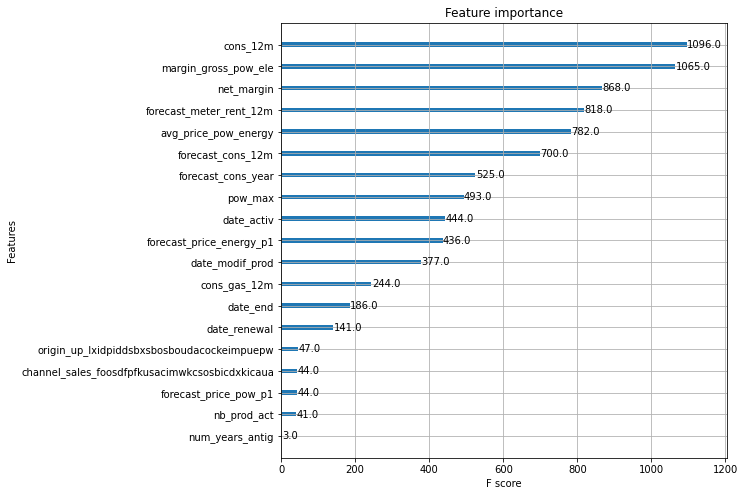

In [36]:
fig,axis=plt.subplots(figsize=(8,8))
xgb.plot_importance(clf4,ax=axis)

# Using RandomForest, GradientBoost, XGBoost together by a Voting Classifier. 

## Voting Classifier 2 (rf, GB, XGB)

In [37]:
est1=RandomForestClassifier(n_estimators=1000,max_samples=0.25,random_state=0,max_depth=10)
est2=GradientBoostingClassifier(n_estimators=1250,random_state=0,learning_rate=0.05,max_depth=3)
est3=xgb.XGBClassifier(n_estimators=1250,max_depth=3,learning_rate=0.35,reg_lambda=0,
                       gamma=0,random_state=0,min_child_weight=0.5)

In [38]:
lst=[('rf',est1),('GB',est2),('XGB',est3)]

In [39]:
model=VotingClassifier(estimators=lst,voting='hard')

In [40]:
model.fit(X_training,y_training)

c:\users\91709\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     max_samples=0.25,
                                                     n_estimators=1000,
                                                     random_state=0)),
                             ('GB',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         n_estimators=1250,
                                                         random_state=0)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=Fals...
                                  

In [41]:
y_pred_model=model.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred_model),precision_score(y_test,y_pred_model),recall_score(y_test,y_pred_model)

(0.85669910954649, 0.31095406360424027, 0.3682008368200837)

In [43]:
confusion_matrix(y_test,y_pred_model)

array([[3961,  390],
       [ 302,  176]], dtype=int64)

# As we can see that the above Voting Classifier has a decent accuracy, also a better precision and recall score than other models tested, so we take this Voting Classifier as our final model, and save it as a pickle file.

In [44]:
pd.to_pickle(model,'final_model.pkl')